In [119]:
from data_preperation import *
import numpy as np
from omero.gateway import BlitzGateway, DatasetWrapper, ImageWrapper, ProjectWrapper, FileAnnotationWrapper
import plotly.express as px


In [120]:
from dash import Dash, html, dcc
import plotly.graph_objects as go
import pandas as pd

In [121]:
import matplotlib.pyplot as plt

In [122]:
conn = BlitzGateway("Asterix", "abc123",group='IGH-Z3', host="localhost", port=6064, secure=True)
conn.connect()

True

In [123]:
from omero_metrics.tools.load import *

In [124]:
project = load_project(conn, 3)

dataset =  get_dataset_by_id(project, 8)

In [125]:
image_omero = conn.getObject("Image", dataset.input.psf_beads_images[0].data_reference.omero_object_id)
image = load_image(image_omero)

In [21]:
image[:,:, :30, :315, 3]

(1, 61, 512, 512, 4)

In [22]:
x = 315 + 20
y = 30 + 20
z = 30
y0 = y - 40
x0 = x - 40

In [126]:
bead_4 = np.max(image[0,:, :, :, 0], axis=0)

In [127]:
bead_4.shape


(512, 512)

In [128]:
s = bead_4 / bead_4.max()
lz, ly, lx = s.shape
Z, Y, X = np.mgrid[:lz, :ly, :lx]
test_v  = go.Figure(data=go.Volume(
x=Z.flatten(), y=Y.flatten(), z=X.flatten(),
value=s.flatten(),
isomin=0,
isomax=1,
opacity=0.1,
surface_count=25,
))
test_v.update_layout(scene_xaxis_showticklabels=False,
              scene_yaxis_showticklabels=False,
              scene_zaxis_showticklabels=False) 

ValueError: not enough values to unpack (expected 3, got 2)

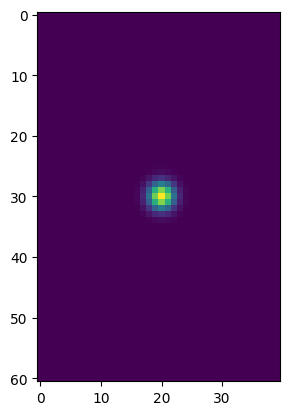

In [33]:
ima1 = image[0,:, y0:y, x0:x, 3]
IM_MAX= np.max(ima1, axis=2)
plt.imshow(IM_MAX)              

In [38]:
s.min()

0.741413163344899

In [129]:
bead_properties_df = get_table_File_id(conn,dataset.output.bead_properties.data_reference.omero_object_id)
                

In [130]:
bead_properties_df

image_name  channel_nr  bead_nr  intensity_max  \
0   PSF-beads_60x_2021-03-01           0        0          49297   
1   PSF-beads_60x_2021-03-01           0        1          50200   
2   PSF-beads_60x_2021-03-01           0        2          49609   
3   PSF-beads_60x_2021-03-01           0        3          49874   
4   PSF-beads_60x_2021-03-01           0        4          48708   
5   PSF-beads_60x_2021-03-01           0        5          49147   
6   PSF-beads_60x_2021-03-01           0        6          53400   
7   PSF-beads_60x_2021-03-01           1        0          43680   
8   PSF-beads_60x_2021-03-01           1        1          44612   
9   PSF-beads_60x_2021-03-01           1        2          44096   
10  PSF-beads_60x_2021-03-01           1        3          44469   
11  PSF-beads_60x_2021-03-01           1        4          43428   
12  PSF-beads_60x_2021-03-01           1        5          43859   
13  PSF-beads_60x_2021-03-01           1        6          53400   
14  PSF-beads_60x_2021-03-01           2        0          39990   
15  PSF-beads_60x_2021-03-01           2        1          40789   
16  PSF-beads_60x_2021-03-01           2        2          40169   
17  PSF-beads_60x_2021-03-01           2        3          40578   
18  PSF-beads_60x_2021-03-01           2        4          39879   
19  PSF-beads_60x_2021-03-01           2        5          40175   
20  PSF-beads_60x_2021-03-01           2        6          53400   
21  PSF-beads_60x_2021-03-01           3        0          37426   
22  PSF-beads_60x_2021-03-01           3        1          37965   
23  PSF-beads_60x_2021-03-01           3        2          37539   
24  PSF-beads_60x_2021-03-01           3        3          37667   
25  PSF-beads_60x_2021-03-01           3        4          37179   
26  PSF-beads_60x_2021-03-01           3        5          37468   
27  PSF-beads_60x_2021-03-01           3        6          53029   

    min_intensity_min  intensity_std  intensity_robust_z_score  \
0               27565     380.171746                  0.683778   
1               27565     399.253110                  0.795483   
2               27565     386.441976                  0.722374   
3               27565     393.959509                  0.755155   
4               27565     372.732422                  0.610916   
5               27565     382.078382                  0.665222   
6               27565     903.695754                  1.191338   
7               27565     329.591449                 -0.011072   
8               27565     346.585561                  0.104221   
9               27565     334.774674                  0.040390   
10              27565     341.799553                  0.086531   
11              27565     322.650371                 -0.042245   
12              27565     331.091475                  0.011072   
13              27565     882.775119                  1.191338   
14              27565     289.226726                 -0.467542   
15              27565     303.987862                 -0.368702   
16              27565     293.989495                 -0.445399   
17              27565     299.468342                 -0.394804   
18              27565     283.199888                 -0.481273   
19              27565     291.375371                 -0.444657   
20              27565     832.333150                  1.191338   
21              27565     256.290081                 -0.784721   
22              27565     268.668199                 -0.718044   
23              27565     260.141483                 -0.770742   
24              27565     265.404783                 -0.754908   
25              27565     251.147107                 -0.815276   
26              27565     257.935879                 -0.779525   
27              27565     765.450579                  1.145444   

    considered_intensity_outlier  z_centroid  y_centroid  ...  y_fit_r2  \
0                              0          30         31

In [131]:
df_beads_location = bead_properties_df[bead_properties_df['channel_nr'] == 0][
        ['bead_nr', 'considered_axial_edge', 'z_centroid', 'y_centroid', 'x_centroid','channel_nr']].copy()

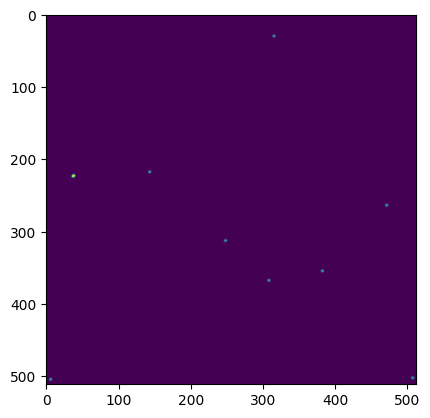

In [132]:
plt.imshow(bead_4)

In [133]:
fig = px.imshow(bead_4, zmin=bead_4.min(), zmax=bead_4.max())
color_map = {0:'red', 1:'yellow'}
fig.add_trace(go.Scatter(y=df_beads_location['y_centroid'], x=df_beads_location['x_centroid'], mode='markers', marker=dict( size=10,  color=df_beads_location['considered_axial_edge'].map(color_map),opacity=0.1), text=df_beads_location['channel_nr'], customdata=df_beads_location['bead_nr'],
                         hovertemplate=
        "   <b>Bead Number</b>  %{customdata} <br>" +
        "   <b>Channel Number</b>  %{text} <br>"
                         ))

In [70]:
import plotly.express as px

df = px.data.medals_long()

In [83]:
type(df_beads_location)

pandas.core.frame.DataFrame

In [110]:
df_beads_location.columns

Index(['bead_nr', 'considered_axial_edge', 'z_centroid', 'y_centroid',
       'x_centroid', 'channel_nr'],
      dtype='object')

In [117]:
df_beads_location.bead_nr

0    0
1    1
2    2
3    3
4    4
5    5
6    6
Name: bead_nr, dtype: int64

In [141]:
dataset.output.__dict__.keys()

dict_keys(['processing_application', 'processing_version', 'processing_datetime', 'processing_entity', 'processing_log', 'warnings', 'errors', 'comment', 'analyzed_bead_centers', 'discarded_bead_centers_lateral_edge', 'discarded_bead_centers_self_proximity', 'considered_bead_centers_axial_edge', 'considered_bead_centers_intensity_outlier', 'considered_bead_centers_z_fit_quality', 'considered_bead_centers_y_fit_quality', 'considered_bead_centers_x_fit_quality', 'key_values', 'bead_properties', 'bead_z_profiles', 'bead_y_profiles', 'bead_x_profiles'])

In [142]:
dataset.output.analyzed_bead_centers

[Roi(name='analyzed_bead_centroids_PSF-beads_60x_2021-03-01', description='analyzed_bead_centroids in image PSF-beads_60x_2021-03-01', data_reference=None, linked_references=[DataReference(data_uri='https://localhost:6064/webclient/?show=roi-131', omero_host='localhost', omero_port=6064, omero_object_type=(text='ROI', description='A region of interest'), omero_object_id=131)], points=[Point(name='ch00_b00', description=None, z=30.0, c=0, t=None, fill_color=None, stroke_color=Color(r=0, g=255, b=0, alpha=100), stroke_width=8, y=313.5, x=248.5), Point(name='ch00_b01', description=None, z=30.0, c=0, t=None, fill_color=None, stroke_color=Color(r=0, g=255, b=0, alpha=100), stroke_width=8, y=218.5, x=143.5), Point(name='ch00_b02', description=None, z=57.0, c=0, t=None, fill_color=None, stroke_color=Color(r=0, g=255, b=0, alpha=100), stroke_width=8, y=264.5, x=471.5), Point(name='ch00_b03', description=None, z=30.0, c=0, t=None, fill_color=None, stroke_color=Color(r=0, g=255, b=0, alpha=100),